## Importing the libraries

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [61]:
dataset = pd.read_csv('../Datasets/data.csv')
# X = dataset.iloc[:, 1:].values
# y = dataset.iloc[:, 0].values
X = dataset.drop(columns=['Bankrupt?'])
y = dataset['Bankrupt?']

In [62]:
dataset

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [63]:
print (X)

       ROA(C) before interest and depreciation before interest  \
0                                              0.370594          
1                                              0.464291          
2                                              0.426071          
3                                              0.399844          
4                                              0.465022          
...                                                 ...          
6814                                           0.493687          
6815                                           0.475162          
6816                                           0.472725          
6817                                           0.506264          
6818                                           0.493053          

       ROA(A) before interest and % after tax  \
0                                    0.424389   
1                                    0.538214   
2                                    0.499019   
3          

In [64]:
print(y)

0       1
1       1
2       1
3       1
4       1
       ..
6814    0
6815    0
6816    0
6817    0
6818    0
Name: Bankrupt?, Length: 6819, dtype: int64


## Missing Data

In [65]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') #instance of the class
imputer.fit(X) # all columns with numeric values
X = imputer.transform(X) # this does the replacement, returns the updated features

In [66]:
y.value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

## Splitting dataset into Training set and Test set


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## Feature Scaling

In [68]:
# How to know when we should so feature scaling?

# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train=  sc.fit_transform(X_train)
# X_test=  sc.transform(X_test)

### Seaborn Graphs



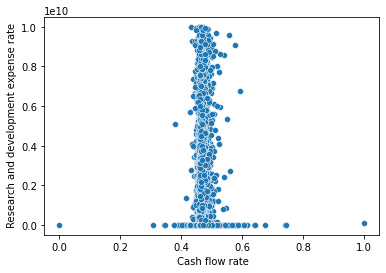

In [69]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# sns.set_theme(style="darkgrid")
df = pd.read_csv("../Datasets/data.csv")
sns.scatterplot(data = df, x = " Cash flow rate", y = " Research and development expense rate")
plt.show()


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' Cash flow rate', ylabel='Density'>

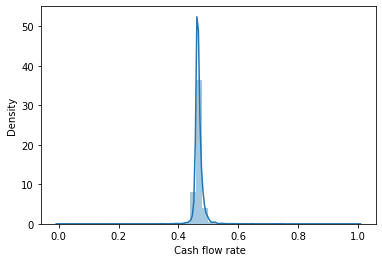

In [70]:
sns.distplot(df[" Cash flow rate"])

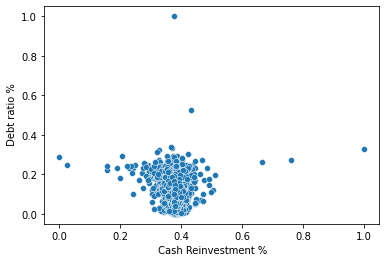

In [71]:
sns.scatterplot(data = df, x = " Cash Reinvestment %", y = " Debt ratio %")
plt.show()

In [72]:
# sns.set_theme(style="ticks", palette="pastel")
# sns.boxplot(x = " Cash Reinvestment %", y = " Debt ratio %", palette=["m", "g"], data=df, hue="Bankrupt?")
# sns.despine(offset=10, trim=True)
# plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel=' Cash flow rate'>

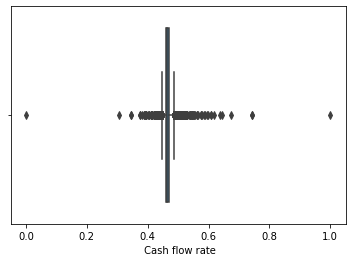

In [73]:
sns.boxplot(df[" Cash flow rate"], orient="h")
# search seaborn boxplot

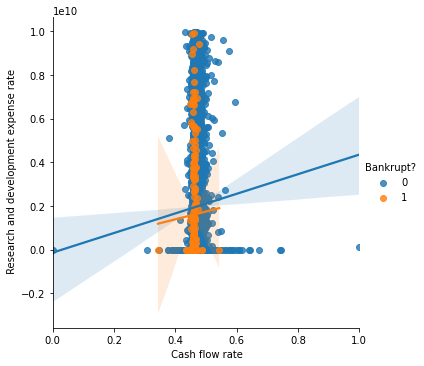

In [74]:
g = sns.lmplot(
    data=df,
    x = " Cash flow rate", y = " Research and development expense rate", hue="Bankrupt?",
    height=5
)
plt.show()

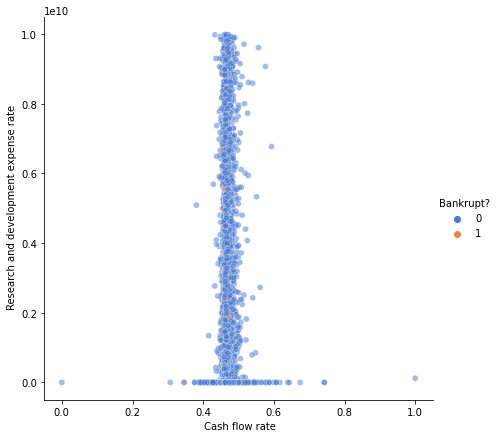

In [75]:
sns.relplot(x = " Cash flow rate", y = " Research and development expense rate", hue="Bankrupt?",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=df)
plt.show()

In [76]:
# sns.set_theme(style="whitegrid", palette="muted")

# ax = sns.swarmplot(data=df, x = " Cash flow rate", y = " Research and development expense rate", hue="Bankrupt?")
# plt.show()

In [77]:
df.shape

(6819, 96)

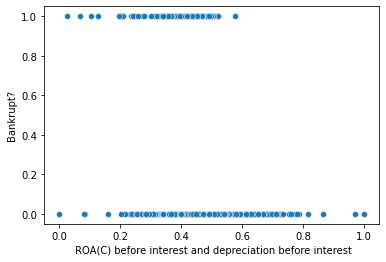

In [78]:
sns.scatterplot(data = df, x = " ROA(C) before interest and depreciation before interest", y = "Bankrupt?")
plt.show()

### Insight
#### For any value above 0.55 the bankruptcy is always 0

In [79]:
pd.cut(df[" ROA(C) before interest and depreciation before interest"], bins=10, right=True, retbins=True)

(0       (0.3, 0.4]
 1       (0.4, 0.5]
 2       (0.4, 0.5]
 3       (0.3, 0.4]
 4       (0.4, 0.5]
            ...    
 6814    (0.4, 0.5]
 6815    (0.4, 0.5]
 6816    (0.4, 0.5]
 6817    (0.5, 0.6]
 6818    (0.4, 0.5]
 Name:  ROA(C) before interest and depreciation before interest, Length: 6819, dtype: category
 Categories (10, interval[float64]): [(-0.001, 0.1] < (0.1, 0.2] < (0.2, 0.3] < (0.3, 0.4] ... (0.6, 0.7] < (0.7, 0.8] < (0.8, 0.9] < (0.9, 1.0]],
 array([-0.001,  0.1  ,  0.2  ,  0.3  ,  0.4  ,  0.5  ,  0.6  ,  0.7  ,
         0.8  ,  0.9  ,  1.   ]))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(-0.001, 0.1]'),
  Text(1, 0, '(0.1, 0.2]'),
  Text(2, 0, '(0.2, 0.3]'),
  Text(3, 0, '(0.3, 0.4]'),
  Text(4, 0, '(0.4, 0.5]'),
  Text(5, 0, '(0.5, 0.6]'),
  Text(6, 0, '(0.6, 0.7]'),
  Text(7, 0, '(0.7, 0.8]'),
  Text(8, 0, '(0.8, 0.9]'),
  Text(9, 0, '(0.9, 1.0]')])

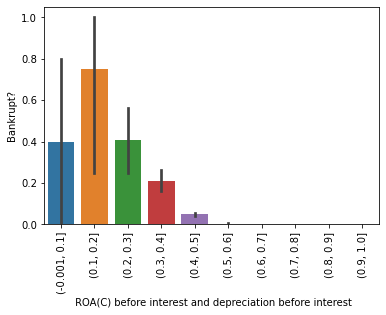

In [80]:
modifiedROA = pd.cut(df[" ROA(C) before interest and depreciation before interest"], bins=10, right=True)
sns.barplot (data = df, x = modifiedROA, y = "Bankrupt?")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '(-0.001, 0.1]'),
  Text(1, 0, '(0.1, 0.2]'),
  Text(2, 0, '(0.2, 0.3]'),
  Text(3, 0, '(0.3, 0.4]'),
  Text(4, 0, '(0.4, 0.5]'),
  Text(5, 0, '(0.5, 0.6]'),
  Text(6, 0, '(0.6, 0.7]'),
  Text(7, 0, '(0.7, 0.8]'),
  Text(8, 0, '(0.8, 0.9]'),
  Text(9, 0, '(0.9, 1.0]')])

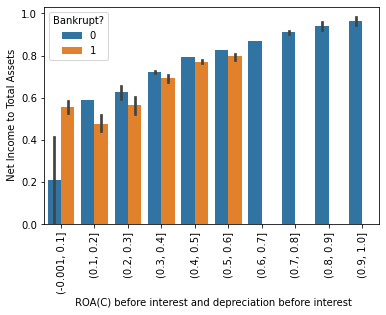

In [81]:
sns.barplot (data = df, x = modifiedROA, y=" Net Income to Total Assets", hue = "Bankrupt?")
plt.xticks(rotation=90)

In [82]:
modifiedROA.value_counts()

(0.5, 0.6]       3233
(0.4, 0.5]       2971
(0.6, 0.7]        327
(0.3, 0.4]        220
(0.2, 0.3]         32
(0.7, 0.8]         23
(-0.001, 0.1]       5
(0.1, 0.2]          4
(0.8, 0.9]          2
(0.9, 1.0]          2
Name:  ROA(C) before interest and depreciation before interest, dtype: int64

<AxesSubplot:>

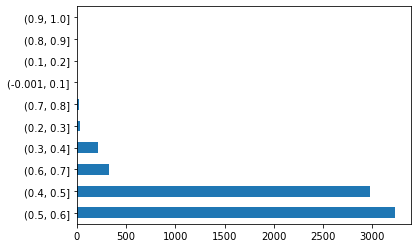

In [83]:
modifiedROA.value_counts().plot(kind='barh')

<AxesSubplot:>

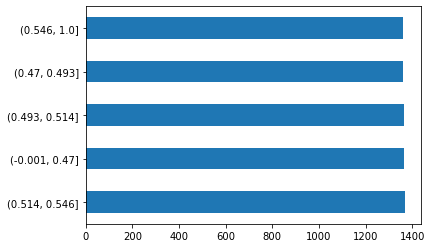

In [84]:
modifiedROA = pd.qcut(df[" ROA(C) before interest and depreciation before interest"], q=5)
# sns.barplot (data = df, x = modifiedROA, y = "Bankrupt?")
modifiedROA.value_counts().plot(kind='barh')

<AxesSubplot:xlabel=' Quick Asset Turnover Rate', ylabel=' Current Asset Turnover Rate'>

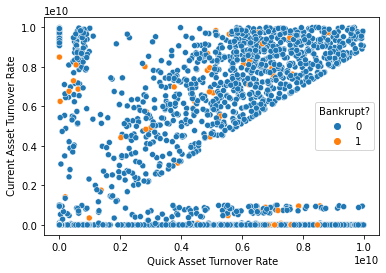

In [85]:
sns.scatterplot(data = df, y=" Current Asset Turnover Rate", x=" Quick Asset Turnover Rate", hue="Bankrupt?")

<AxesSubplot:xlabel=' Current Asset Turnover Rate', ylabel='Bankrupt?'>

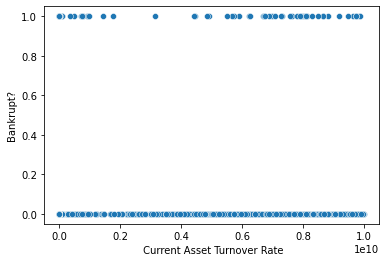

In [86]:
sns.scatterplot(data = df, x = " Current Asset Turnover Rate", y = "Bankrupt?")

<AxesSubplot:xlabel=' Quick Asset Turnover Rate', ylabel='Bankrupt?'>

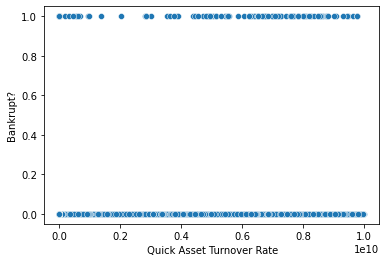

In [87]:
sns.scatterplot(data = df, x = " Quick Asset Turnover Rate", y = "Bankrupt?")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' Operating Gross Margin', ylabel='Density'>

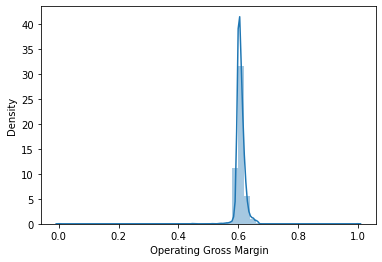

In [88]:
sns.distplot(df[' Operating Gross Margin'])

<AxesSubplot:xlabel=' Average Collection Days', ylabel='Bankrupt?'>

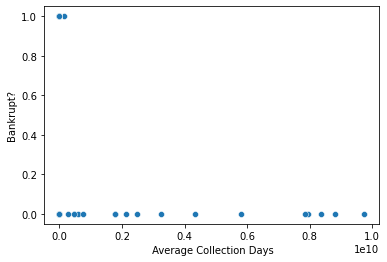

In [89]:
sns.scatterplot(data = df, x = " Average Collection Days", y = "Bankrupt?")

<AxesSubplot:xlabel=' Average Collection Days', ylabel=' Inventory Turnover Rate (times)'>

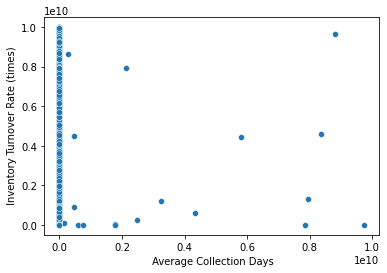

In [90]:
sns.scatterplot(data = df, x = " Average Collection Days", y = " Inventory Turnover Rate (times)")

<AxesSubplot:xlabel=' Revenue per person', ylabel=' Operating profit per person'>

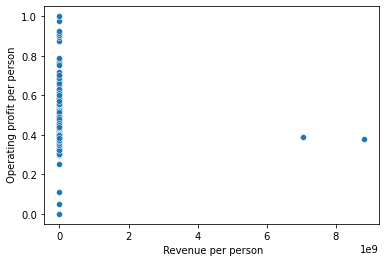

In [91]:
sns.scatterplot(data = df, x = " Revenue per person", y = " Operating profit per person")

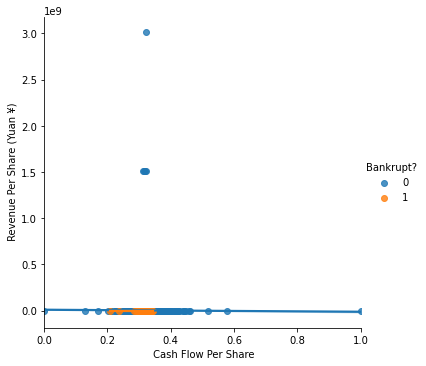

In [92]:
sns.lmplot(
    data=df,
    x = " Cash Flow Per Share", y = " Revenue Per Share (Yuan ¥)", hue="Bankrupt?",
    height=5
)

In [93]:
from matplotlib import pyplot as plt

In [94]:
plt.Figure(figsize=(10,10))

<Figure size 720x720 with 0 Axes>

<AxesSubplot:>

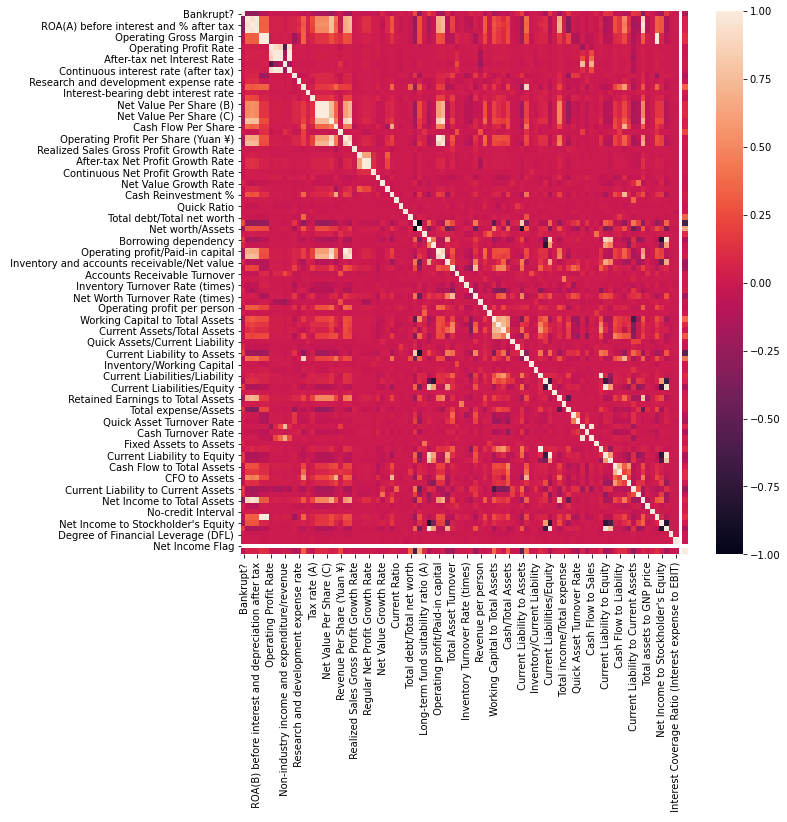

In [95]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

<AxesSubplot:>

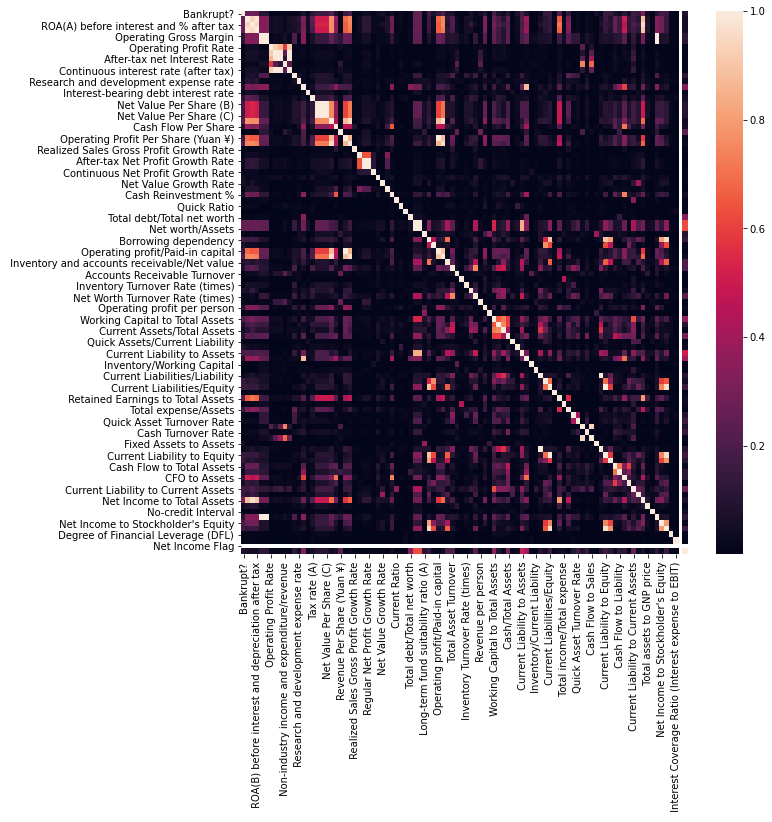

In [96]:
plt.figure(figsize=(10,10))
sns.heatmap(abs(df.corr()))

In [97]:
# shows correlationship between the features 
# ranges from -1 to 1
# 1 and -1 means strongly correated
# any value around means no correaltion
# 1 means increase with increase or decreases with decrease
# -1 decreases with increase or vice versa
df.corr().head(10)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
Realized Sales Gross Margin,-0.099445,0.332755,0.324956,0.331755,0.999518,1.000000,0.005610,0.032232,0.026851,0.051242,...,0.298155,0.022750,0.004038,0.999518,0.074891,-0.085407,-0.011268,-0.001158,NaN,0.120196
Operating Profit Rate,-0.000230,0.035725,0.032053,0.035212,0.005745,0.005610,1.000000,0.916448,0.862191,-0.592006,...,0.028482,-0.003338,0.000199,0.005746,0.006216,0.001541,0.000935,0.000393,NaN,-0.017071
Pre-tax net Interest Rate,-0.008517,0.053419,0.053518,0.053726,0.032493,0.032232,0.916448,1.000000,0.986379,-0.220045,...,0.048587,-0.004243,-0.000075,0.032494,0.011343,-0.004043,0.000855,0.000984,NaN,-0.014559
After-tax net Interest Rate,-0.008857,0.049222,0.049474,0.049952,0.027175,0.026851,0.862191,0.986379,1.000000,-0.115211,...,0.045390,-0.003786,-0.001091,0.027176,0.010648,-0.004390,0.000927,0.000957,NaN,-0.010900
Non-industry income and expenditure/revenue,-0.016593,0.020501,0.029649,0.022366,0.051438,0.051242,-0.592006,-0.220045,-0.115211,1.000000,...,0.028423,-0.000408,-0.000637,0.051437,0.007693,-0.011899,-0.000556,0.001024,NaN,0.012293


<AxesSubplot:xlabel=' After-tax net Interest Rate', ylabel=' Cash Flow to Sales'>

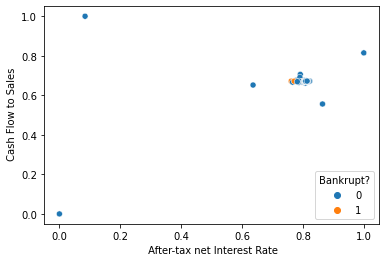

In [98]:
sns.scatterplot(data = df, x = " After-tax net Interest Rate", y = " Cash Flow to Sales", hue="Bankrupt?")

### Insight:
#### After tax-net interest rate values are above 0.7
#### Cash flow to sales values are above 0.6

<AxesSubplot:xlabel=' Net Income to Total Assets', ylabel=' ROA(A) before interest and % after tax'>

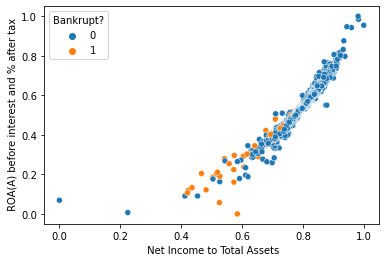

In [99]:
sns.scatterplot(data = df, x = " Net Income to Total Assets", y = " ROA(A) before interest and % after tax", hue="Bankrupt?")

### Insight:
#### Net income to Total Assets increases with increase in ROA

<AxesSubplot:xlabel=' Current Liabilities/Equity', ylabel=' Liability to Equity'>

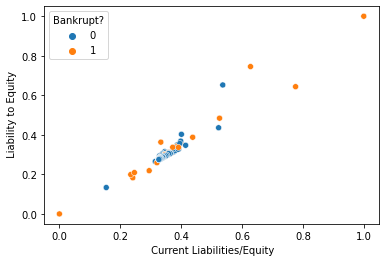

In [100]:
sns.scatterplot(data = df, x = " Current Liabilities/Equity", y = " Liability to Equity", hue="Bankrupt?")

### Insight:
#### Current Liabilities increases with increase in Liability to Equity

<AxesSubplot:xlabel=' Gross Profit to Sales', ylabel=' Operating Gross Margin'>

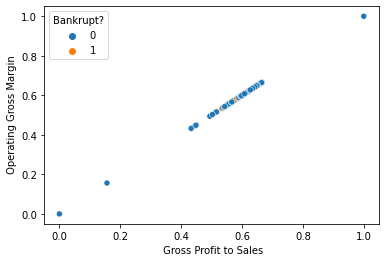

In [101]:
sns.scatterplot(data = df, x = " Gross Profit to Sales", y = " Operating Gross Margin", hue="Bankrupt?")

### Insight: 
#### Gross Profit to Sales increases with increase in Operating Gross Margin
#### The value ranges between 0.4 and 0.8 
#### There are 3 outliers

<AxesSubplot:xlabel=' Operating Gross Margin', ylabel='Bankrupt?'>

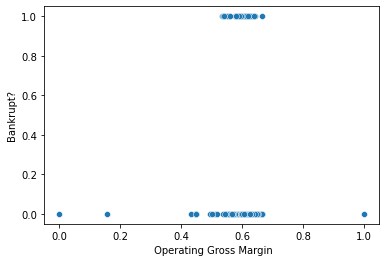

In [102]:
sns.scatterplot(data = df, x = " Operating Gross Margin", y = "Bankrupt?")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' Operating profit per person', ylabel='Density'>

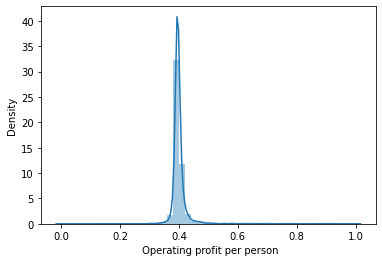

In [103]:
sns.distplot(df[' Operating profit per person'])

<AxesSubplot:xlabel=' Gross Profit to Sales', ylabel=" Net Income to Stockholder's Equity">

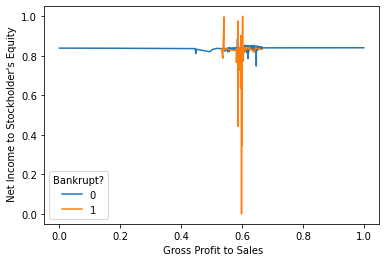

In [104]:
sns.lineplot(data = df, x = " Gross Profit to Sales", y = " Net Income to Stockholder's Equity", hue="Bankrupt?")

<AxesSubplot:xlabel=' Gross Profit to Sales', ylabel=" Net Income to Stockholder's Equity">

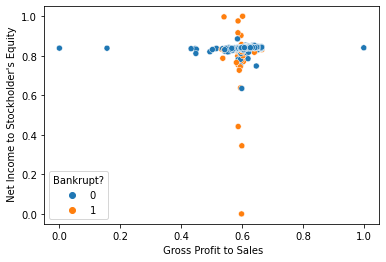

In [105]:
sns.scatterplot(data = df, x = " Gross Profit to Sales", y = " Net Income to Stockholder's Equity", hue="Bankrupt?")

<AxesSubplot:xlabel=" Net Income to Stockholder's Equity", ylabel='Bankrupt?'>

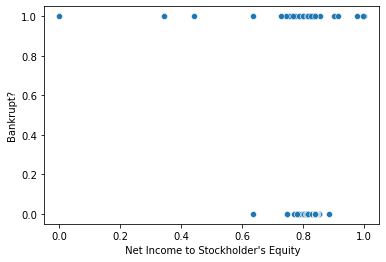

In [106]:
sns.scatterplot(data = df, x = " Net Income to Stockholder's Equity", y = "Bankrupt?")

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel=' Current Ratio', ylabel='Density'>

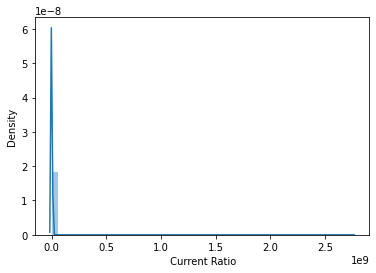

In [107]:
sns.distplot(df[' Current Ratio'])

<AxesSubplot:xlabel=' Current Ratio', ylabel='Bankrupt?'>

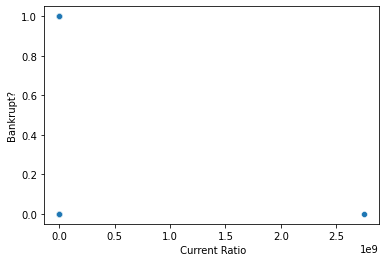

In [108]:
sns.scatterplot(data = df, x = " Current Ratio", y = "Bankrupt?")